# Analysis Notebook
By Duncan McGough

---

## Load packages:

In [24]:
using CSV
using Plots; gr();

## Import Static Data:

In [60]:
l_sample = 1000 # number of sample points
static_path = "/home/duncan/github/thesis/sim/analysis/static/" # path to static mesh simulations
#static_names = ["250_40_1","625_100_1","1250_200_1","2500_400_1","5000_800_1","10000_1600_1"] .* "/" # simulation directory names
static_names = ["10000_1600_1","5000_800_1","2500_400_1","1250_200_1","625_100_1","250_40_1"] .* "/" # simulation directory names
#static_names = ["10000_1600_1"] .* "/" # simulation directory names
static_nsims = length(static_names) # number of static simulations
pp_s = "postProcessing/sample/3e-05/" # path to line samples
Tp_s = "data_T_p_H2.xy" # T, p data file name
U_s = "data_U.xy" # U vector file name 

tmp = [] # initalize temp dataframe variable 
static_x = zeros(l_sample,static_nsims) # initialize position
static_p = zeros(l_sample,static_nsims) # initialize pressure
static_T = zeros(l_sample,static_nsims) # initialize temperature
static_Ux = zeros(l_sample,static_nsims) # initialize x velocity
static_H2 = zeros(l_sample,static_nsims) # initialize x velocity

for i=1:static_nsims # sweep through refinements
    tmp = CSV.read(static_path*static_names[i]*pp_s*Tp_s,delim=' ',header=0) # import position, temp, pressure
    static_x[:,i] = tmp[:,1] # store position
    static_p[:,i] = tmp[:,3] # store pressure
    static_T[:,i] = tmp[:,2] # store temperature
    static_H2[:,i]= tmp[:,4] # store H2 specie
    
    tmp = CSV.read(static_path*static_names[i]*pp_s*U_s,delim=' ',header=0) # import position, Ux, Uy, Uz
    static_Ux[:,i] = tmp[:,2] # store Ux
end

## Plot Static Meshes

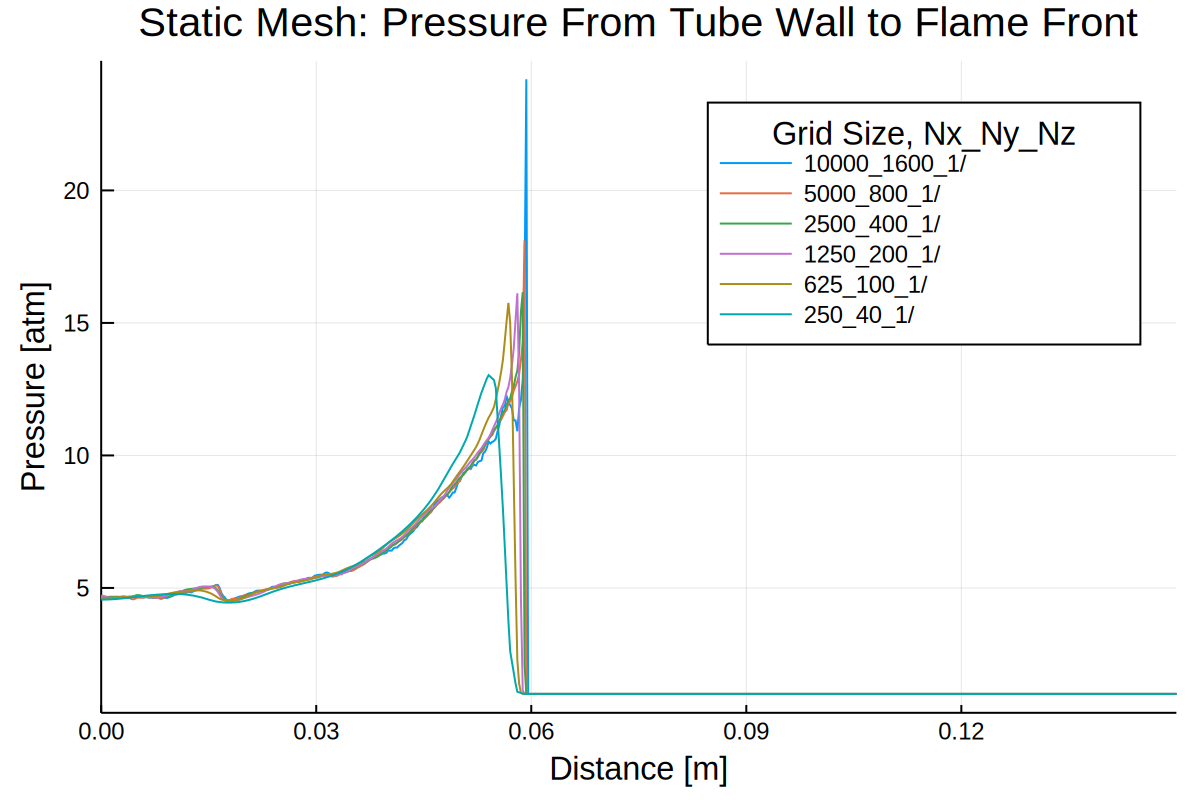

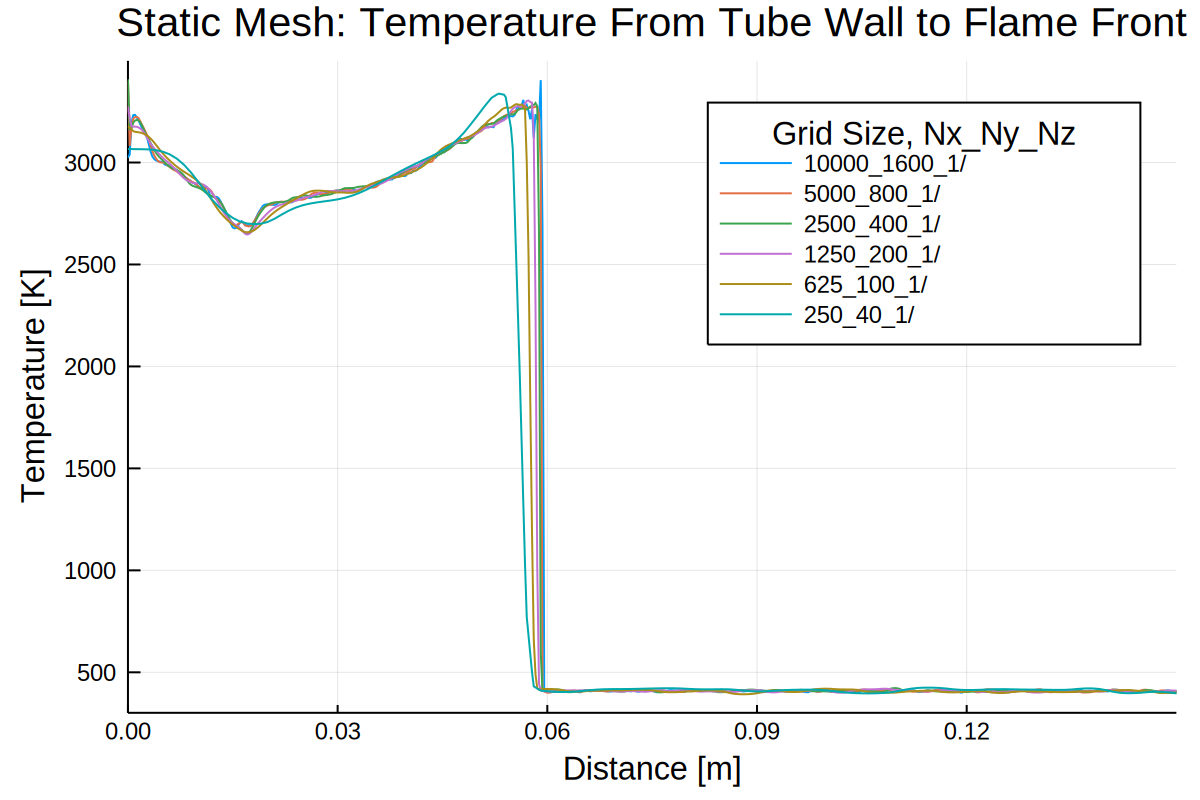

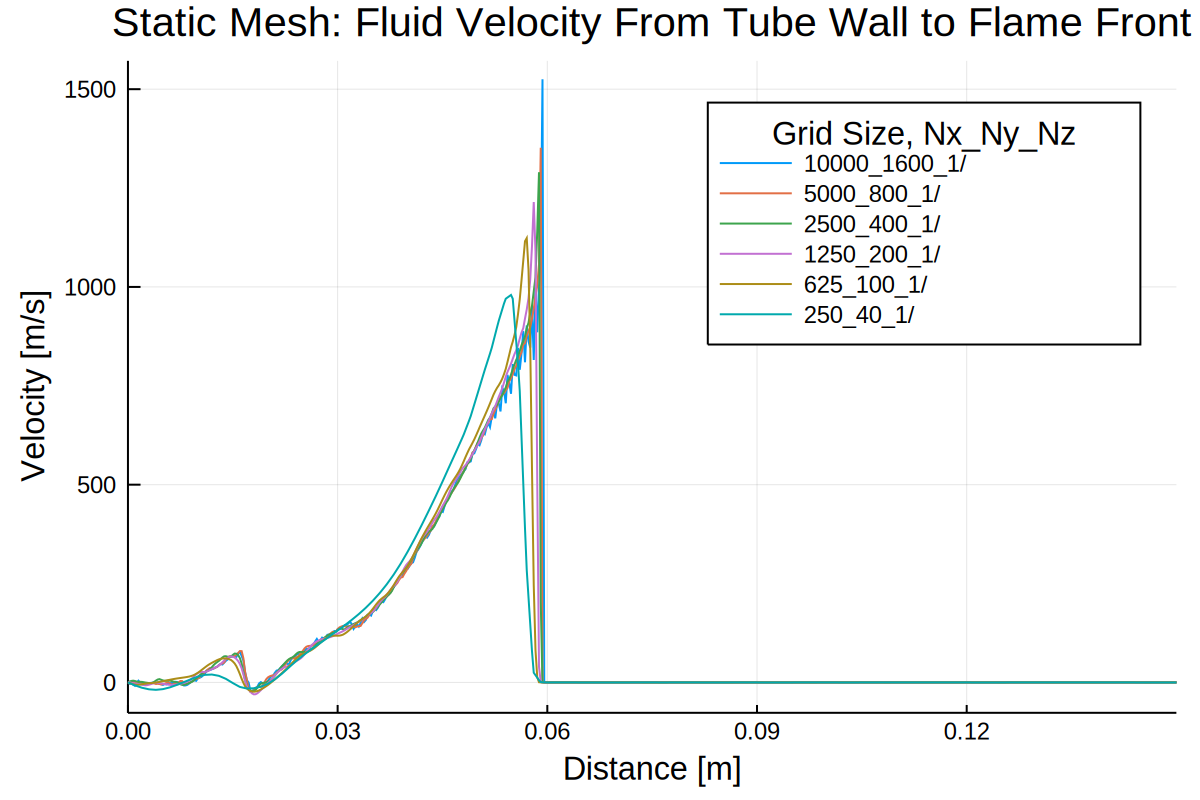

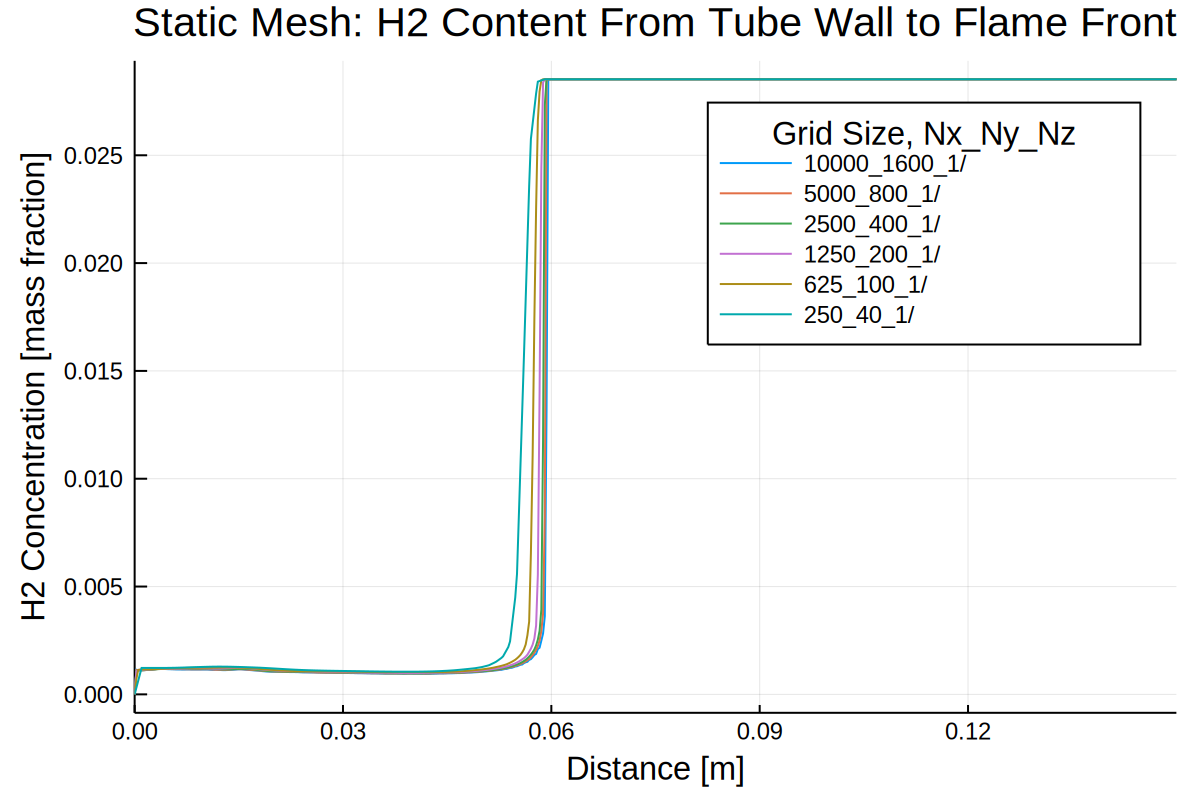

In [123]:
p_plot = plot() # initialize plot
for i=1:static_nsims # sweep through simulations
    plot!(static_x[:,i],static_p[:,i]*0.000009869233,xlims=(0,0.15),label=static_names[i])
end
title!("Static Mesh: Pressure From Tube Wall to Flame Front")
xlabel!("Distance [m]")
ylabel!("Pressure [atm]")
plot!(legendtitle="Grid Size, Nx_Ny_Nz",dpi=200)
#plot!(LinRange(0,0.5,1000),ones(1000).*15.56,xlims=(0,0.17),label="Target",linestyle=:dash,c="black")
savefig("./staticfigs/p.png")
display(p_plot)

t_plot = plot() # initialize plot
for i=1:static_nsims # sweep through simulations
    plot!(static_x[:,i],static_T[:,i],xlims=(0,0.15),label=static_names[i])
end
title!("Static Mesh: Temperature From Tube Wall to Flame Front")
xlabel!("Distance [m]")
ylabel!("Temperature [K]")
plot!(legendtitle="Grid Size, Nx_Ny_Nz",dpi=200)
#plot!(LinRange(0,0.5,1000),ones(1000).*15.56,xlims=(0,0.17),label="Target",linestyle=:dash,c="black")
savefig("./staticfigs/t.png")
display(t_plot)

u_plot = plot() # initialize plot
for i=1:static_nsims # sweep through simulations
    plot!(static_x[:,i],static_Ux[:,i],xlims=(0,0.15),label=static_names[i])
end
title!("Static Mesh: Fluid Velocity From Tube Wall to Flame Front")
xlabel!("Distance [m]")
ylabel!("Velocity [m/s]")
plot!(legendtitle="Grid Size, Nx_Ny_Nz",dpi=200)
#plot!(LinRange(0,0.5,1000),ones(1000).*15.56,xlims=(0,0.17),label="Target",linestyle=:dash,c="black")
savefig("./staticfigs/u.png")
display(u_plot)

h_plot = plot() # initialize plot
for i=1:static_nsims # sweep through simulations
    plot!(static_x[:,i],static_H2[:,i],xlims=(0,0.15),label=static_names[i])
end
title!("Static Mesh: H2 Content From Tube Wall to Flame Front")
xlabel!("Distance [m]")
ylabel!("H2 Concentration [mass fraction]")
plot!(legendtitle="Grid Size, Nx_Ny_Nz",dpi=200)
#plot!(LinRange(0,0.5,1000),ones(1000).*15.56,xlims=(0,0.17),label="Target",linestyle=:dash,c="black")
savefig("./staticfigs/y.png")
display(h_plot)

## AMR Data: 300,000 max cells

In [193]:
l_sample = 1000 # number of sample points
amr_path = "/home/duncan/github/thesis/sim/analysis/amr/" # path to static mesh simulations
#amr_sim = ["10xbase/ngP_01_02_1_2_4","10xbase/ngP_01_02_1_3_3","100000/ngP_01_02_1_1_5","300000/ngP_01_02_1_2_5"] .* "/" # specific AMR run
#amr_sim = ["300000/ngP_01_02_1_4_4"] .* "/" # specific AMR run
amr_sim = ["300000/ngP_01_02_1_5_5","300000/ngP_01_02_1_4_4","300000/ngP_03_03_1_3_4"] .* "/" # specific AMR run
#amr_sim = ["300000/ngP_01_02_1_4_4","300000/ngP_01_02_1_4_4_try2"] .* "/" # specific AMR run
#amr_sim = ["10xbase/ngP_01_02_1_2_4","300000/ngP_01_02_1_2_5","300000/ngP_01_02_1_3_4","300000/ngP_01_02_1_4_4"] .* "/" # specific AMR run
amr_names = ["250_40_1"] .* "/" # simulation directory names
#amr_sim = ["ngP_01_02_1_3_3"] .* "/" # specific AMR run
#amr_names = ["250_40_1","500_80_1"] .* "/" # simulation directory names
amr_nsims = length(amr_names) # number of amr cases per directory
amr_ntests = length(amr_sim) # number of generic types of runs (i.e. directories)
pp_s = "postProcessing/sample/3e-05/" # path to line samples
Tp_s = "data_T_p_H2.xy" # T, p data file name
U_s = "data_U.xy" # U vector file name 

tmp = [] # initalize temp dataframe variable 
amr_x = zeros(l_sample,amr_nsims,amr_ntests) # initialize position
amr_p = zeros(l_sample,amr_nsims,amr_ntests) # initialize pressure
amr_T = zeros(l_sample,amr_nsims,amr_ntests) # initialize temperature
amr_Ux = zeros(l_sample,amr_nsims,amr_ntests) # initialize x velocity
amr_H2 = zeros(l_sample,amr_nsims,amr_ntests) # initialize x velocity

for i=1:amr_nsims # sweep through refinements
    for j=1:amr_ntests # sweep through generic cases
        tmp = CSV.read(amr_path*amr_sim[j]*amr_names[i]*pp_s*Tp_s,delim=' ',header=0) # import position, temp, pressure
        amr_x[:,i,j] = tmp[:,1] # store position
        amr_p[:,i,j] = tmp[:,3] # store pressure
        amr_T[:,i,j] = tmp[:,2] # store temperature
        amr_H2[:,i,j]= tmp[:,4] # store H2 specie
    
        tmp = CSV.read(amr_path*amr_sim[j]*amr_names[i]*pp_s*U_s,delim=' ',header=0) # import position, Ux, Uy, Uz
        amr_Ux[:,i,j] = tmp[:,2] # store Ux
    end
end

### Compare to Static

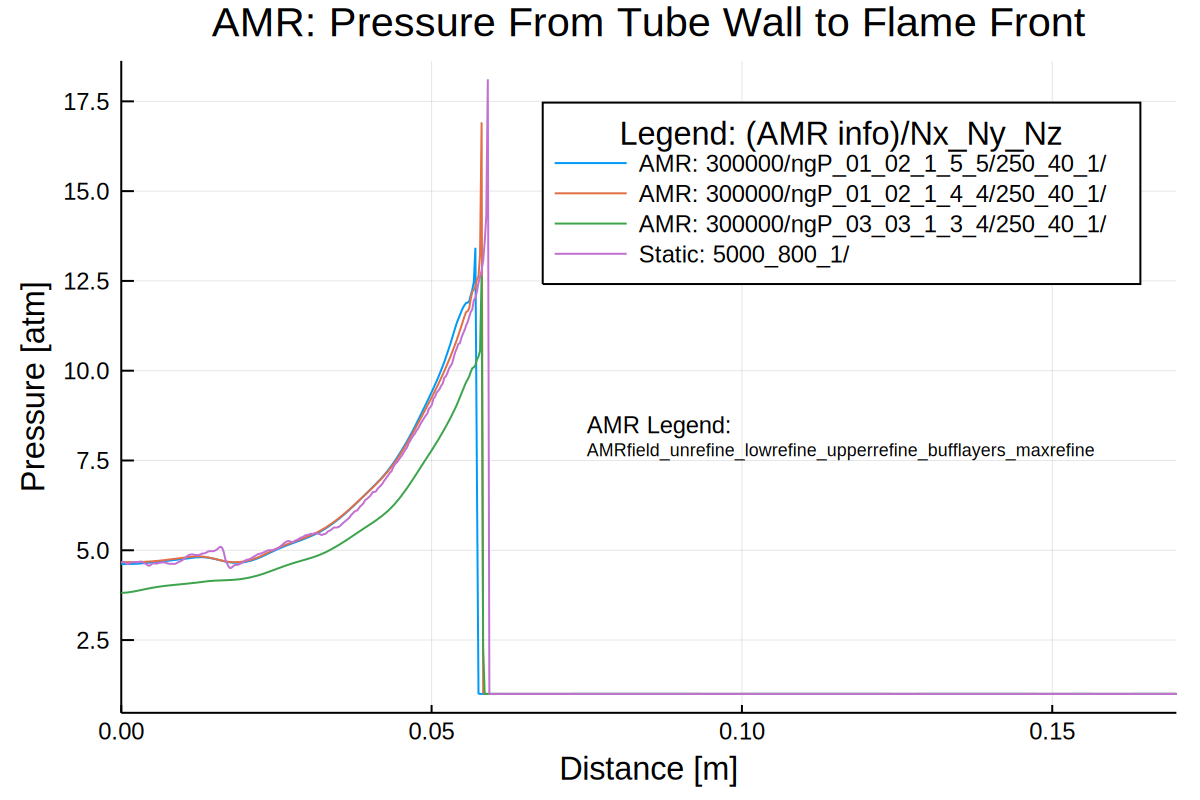

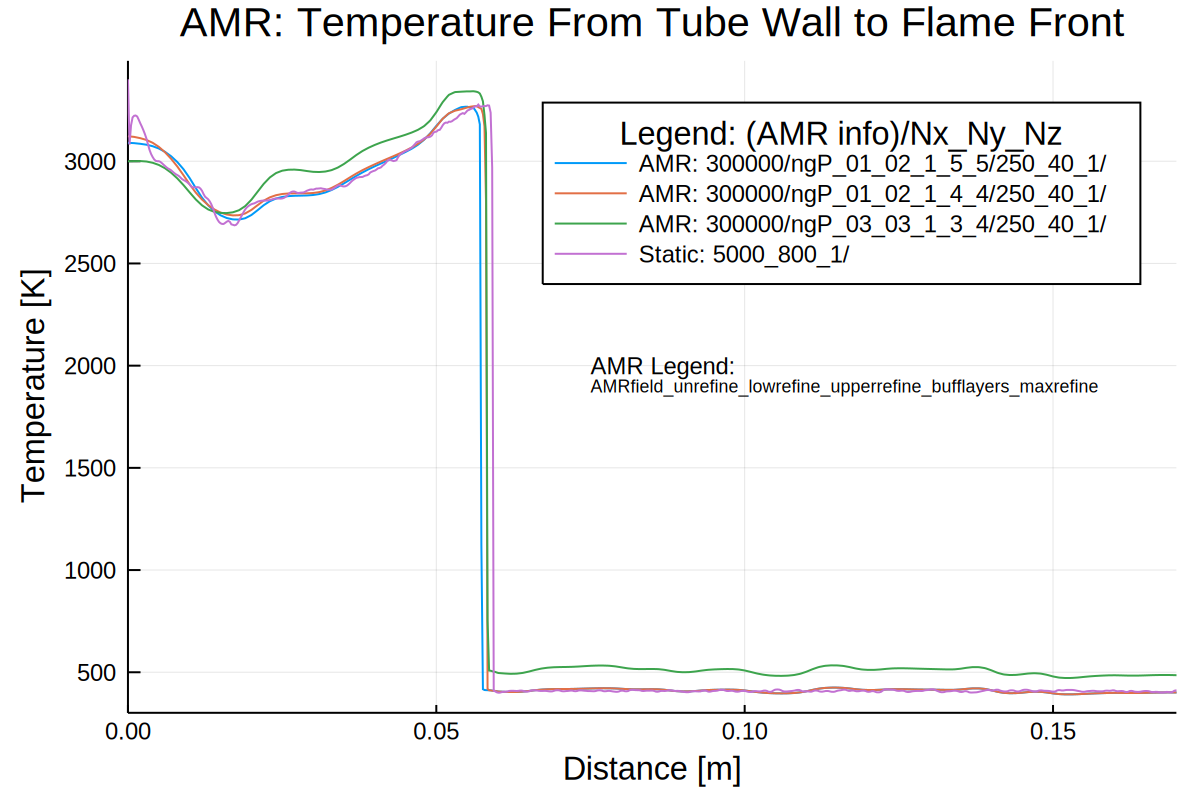

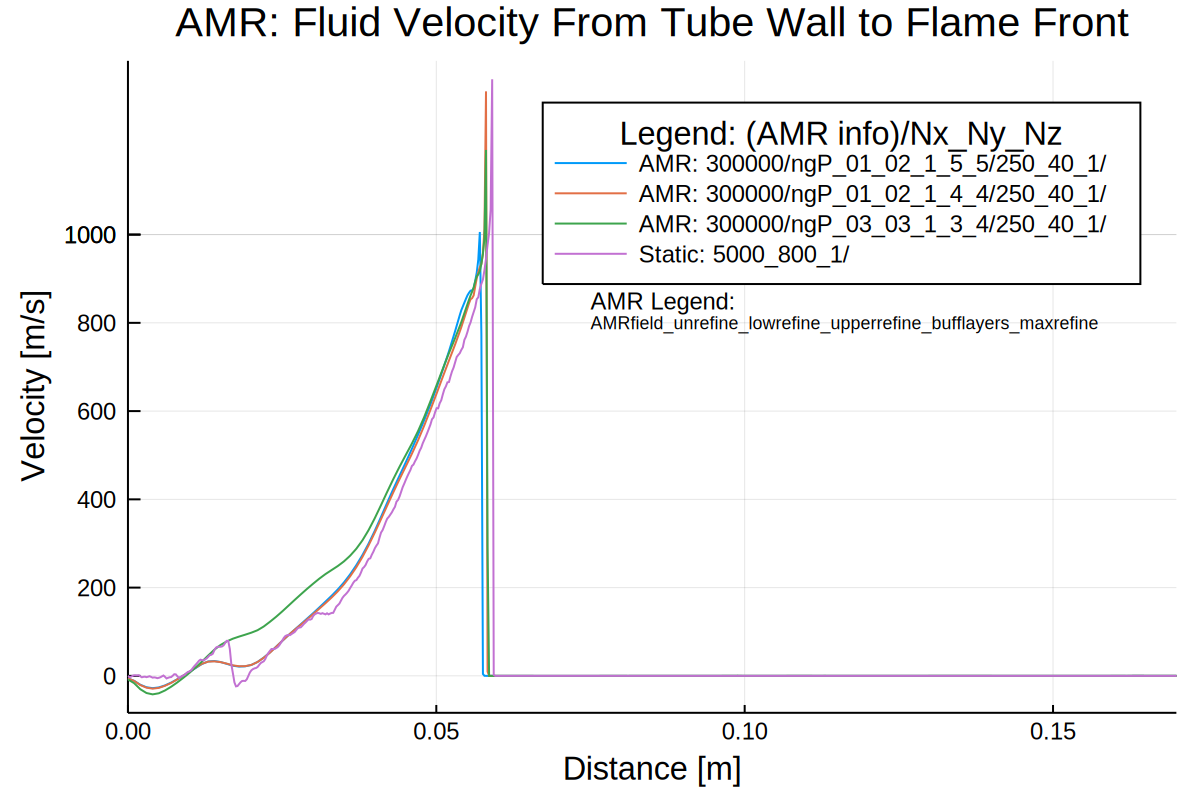

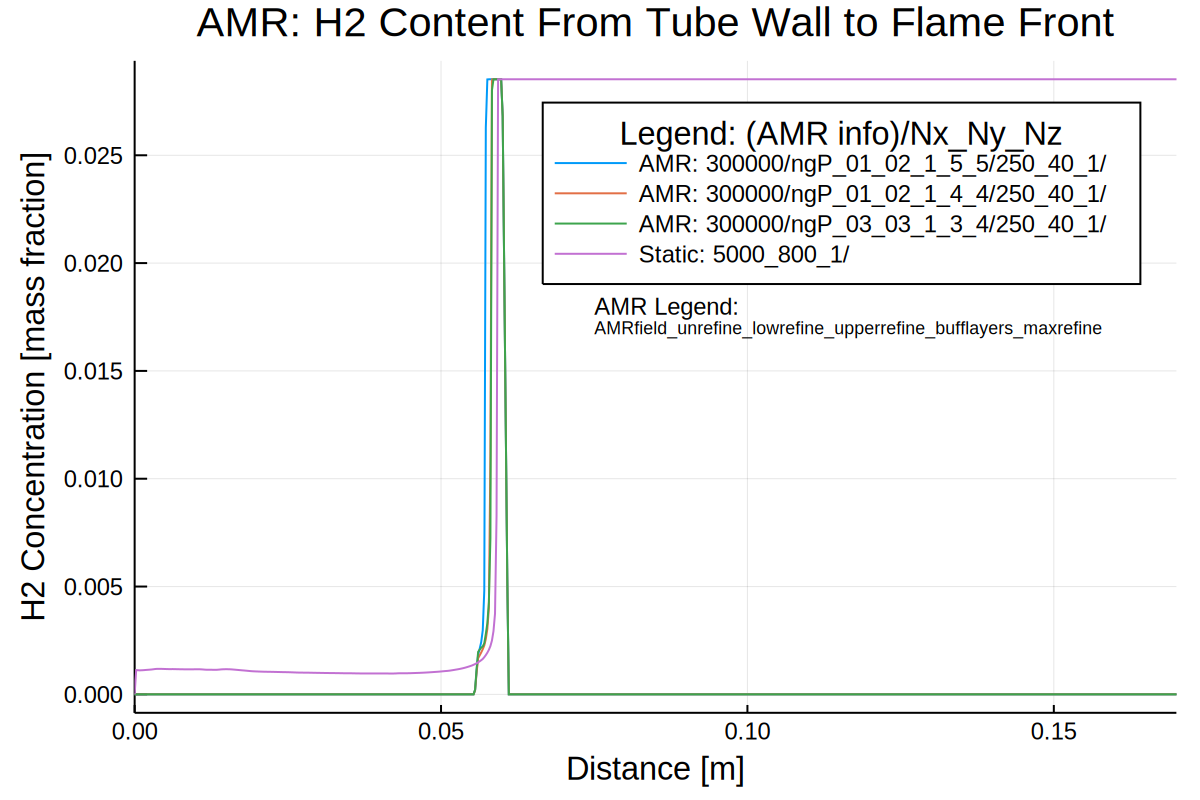

In [194]:
static_compare = 2 # which static mesh to compare to 

p_plot = plot() # initialize plot
for i=1:amr_nsims # sweep through simulations
    for j=1:amr_ntests # sweep through generic cases 
        plot!(amr_x[:,i,j],amr_p[:,i,j]*0.000009869233,xlims=(0,0.17),label="AMR: "*amr_sim[j]*amr_names[i])
    end
end
plot!(static_x[:,static_compare],static_p[:,static_compare]*0.000009869233,xlims=(0,0.17),label="Static: "*static_names[static_compare])
title!("AMR: Pressure From Tube Wall to Flame Front")
xlabel!("Distance [m]")
ylabel!("Pressure [atm]")
plot!(legendtitle="Legend: (AMR info)/Nx_Ny_Nz",dpi=200)
annotate!([(0.075, 8.5, text("AMR Legend:", 8, :black, :left))])
annotate!([(0.075, 7.8, text("AMRfield_unrefine_lowrefine_upperrefine_bufflayers_maxrefine", 6, :black, :left))])
#plot!(LinRange(0,0.5,1000),ones(1000).*15.56,xlims=(0,0.17),label="Target",linestyle=:dash,c="black")
#savefig("./figs/p.png")
display(p_plot)

t_plot = plot() # initialize plot
for i=1:amr_nsims # sweep through simulations
    for j=1:amr_ntests # sweep through generic cases 
        plot!(amr_x[:,i,j],amr_T[:,i,j],xlims=(0,0.17),label="AMR: "*amr_sim[j]*amr_names[i])
    end
end
plot!(static_x[:,static_compare],static_T[:,static_compare],xlims=(0,0.17),label="Static: "*static_names[static_compare])
title!("AMR: Temperature From Tube Wall to Flame Front")
xlabel!("Distance [m]")
ylabel!("Temperature [K]")
plot!(legendtitle="Legend: (AMR info)/Nx_Ny_Nz",dpi=200)
annotate!([(0.075, 2000, text("AMR Legend:", 8, :black, :left))])
annotate!([(0.075, 1900, text("AMRfield_unrefine_lowrefine_upperrefine_bufflayers_maxrefine", 6, :black, :left))])
#plot!(LinRange(0,0.5,1000),ones(1000).*15.56,xlims=(0,0.17),label="Target",linestyle=:dash,c="black")
#savefig("./figs/p.png")
display(t_plot)

u_plot = plot() # initialize plot
for i=1:amr_nsims # sweep through simulations
    for j=1:amr_ntests # sweep through generic cases 
        plot!(amr_x[:,i,j],amr_Ux[:,i,j],xlims=(0,0.17),label="AMR: "*amr_sim[j]*amr_names[i])
    end
end
plot!(static_x[:,static_compare],static_Ux[:,static_compare],xlims=(0,0.17),label="Static: "*static_names[static_compare])
title!("AMR: Fluid Velocity From Tube Wall to Flame Front")
xlabel!("Distance [m]")
ylabel!("Velocity [m/s]")
plot!(legendtitle="Legend: (AMR info)/Nx_Ny_Nz",dpi=200)
annotate!([(0.075, 850, text("AMR Legend:", 8, :black, :left))])
annotate!([(0.075, 800, text("AMRfield_unrefine_lowrefine_upperrefine_bufflayers_maxrefine", 6, :black, :left))])
#plot!(LinRange(0,0.5,1000),ones(1000).*15.56,xlims=(0,0.17),label="Target",linestyle=:dash,c="black")
#savefig("./figs/p.png")
display(u_plot)

h_plot = plot() # initialize plot
for i=1:amr_nsims # sweep through simulations
    for j=1:amr_ntests # sweep through generic cases 
        plot!(amr_x[:,i,j],amr_H2[:,i,j],xlims=(0,0.17),label="AMR: "*amr_sim[j]*amr_names[i])
    end
end
plot!(static_x[:,static_compare],static_H2[:,static_compare],xlims=(0,0.17),label="Static: "*static_names[static_compare])
title!("AMR: H2 Content From Tube Wall to Flame Front")
xlabel!("Distance [m]")
ylabel!("H2 Concentration [mass fraction]")
plot!(legendtitle="Legend: (AMR info)/Nx_Ny_Nz",dpi=200)
annotate!([(0.075, 0.018, text("AMR Legend:", 8, :black, :left))])
annotate!([(0.075, 0.017, text("AMRfield_unrefine_lowrefine_upperrefine_bufflayers_maxrefine", 6, :black, :left))])
#plot!(LinRange(0,0.5,1000),ones(1000).*15.56,xlims=(0,0.17),label="Target",linestyle=:dash,c="black")
#savefig("./figs/p.png")
display(h_plot)

# AMR Data: 1,000,000 Max Cells

In [235]:
l_sample = 1000 # number of sample points
amr_path = "/home/duncan/github/thesis/sim/analysis/amr/1000000/" # path to static mesh simulations
#amr_sim = ["ngP_02_02_1_3_4","ngP_02_02_1_4_4","ngP_01_01_1_3_4","ngP_01_02_1_4_4","ngP_01_01_1_4_4","ngP_005_01_1_3_4","ngP_01_01_1_3_4"] .* "/" # specific AMR run
#amr_sim = ["ngP_01_02_1_4_4","ngP_01_02_1_4_4_try2","ngP_01_02_1_4_4_try3"] .* "/" # specific AMR run
#amr_sim = ["ngP_01_02_1_4_4","ngP_02_02_1_4_4","ngP_01_01_1_3_4"] .* "/" # specific AMR run
#amr_sim = ["ngP_005_01_1_3_4","ngP_01_02_1_3_4"] .* "/" # specific AMR run
amr_sim = ["ngP_02_02_1_3_3","ngP_01_01_1_4_4"] .* "/" # specific AMR run
amr_names = ["250_40_1"] .* "/" # simulation directory names
amr_nsims = length(amr_names) # number of amr cases per directory
amr_ntests = length(amr_sim) # number of generic types of runs (i.e. directories)
pp_s = "postProcessing/sample/3e-05/" # path to line samples
Tp_s = "data_T_p_H2.xy" # T, p data file name
U_s = "data_U.xy" # U vector file name 

tmp = [] # initalize temp dataframe variable 
amr_x = zeros(l_sample,amr_nsims,amr_ntests) # initialize position
amr_p = zeros(l_sample,amr_nsims,amr_ntests) # initialize pressure
amr_T = zeros(l_sample,amr_nsims,amr_ntests) # initialize temperature
amr_Ux = zeros(l_sample,amr_nsims,amr_ntests) # initialize x velocity
amr_H2 = zeros(l_sample,amr_nsims,amr_ntests) # initialize x velocity

for i=1:amr_nsims # sweep through refinements
    for j=1:amr_ntests # sweep through generic cases
        tmp = CSV.read(amr_path*amr_sim[j]*amr_names[i]*pp_s*Tp_s,delim=' ',header=0) # import position, temp, pressure
        amr_x[:,i,j] = tmp[:,1] # store position
        amr_p[:,i,j] = tmp[:,3] # store pressure
        amr_T[:,i,j] = tmp[:,2] # store temperature
        amr_H2[:,i,j]= tmp[:,4] # store H2 specie
    
        tmp = CSV.read(amr_path*amr_sim[j]*amr_names[i]*pp_s*U_s,delim=' ',header=0) # import position, Ux, Uy, Uz
        amr_Ux[:,i,j] = tmp[:,2] # store Ux
    end
end

### Compare to Static

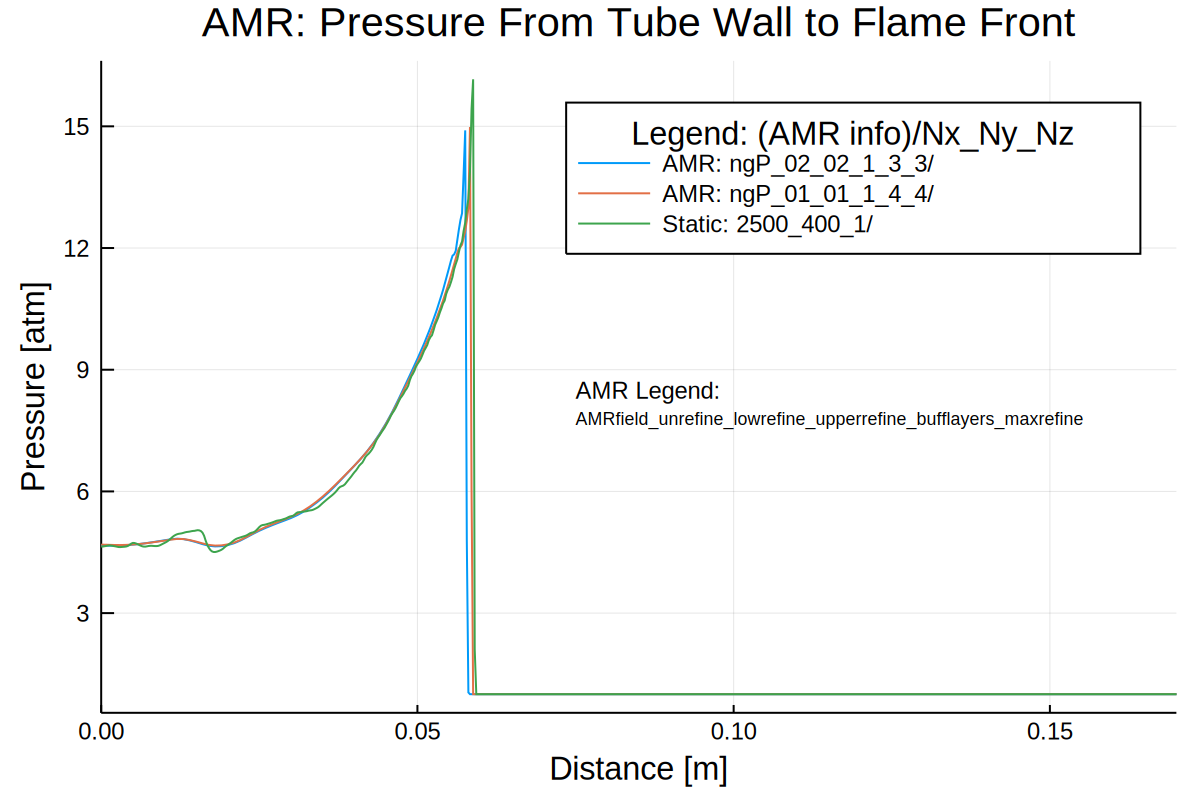

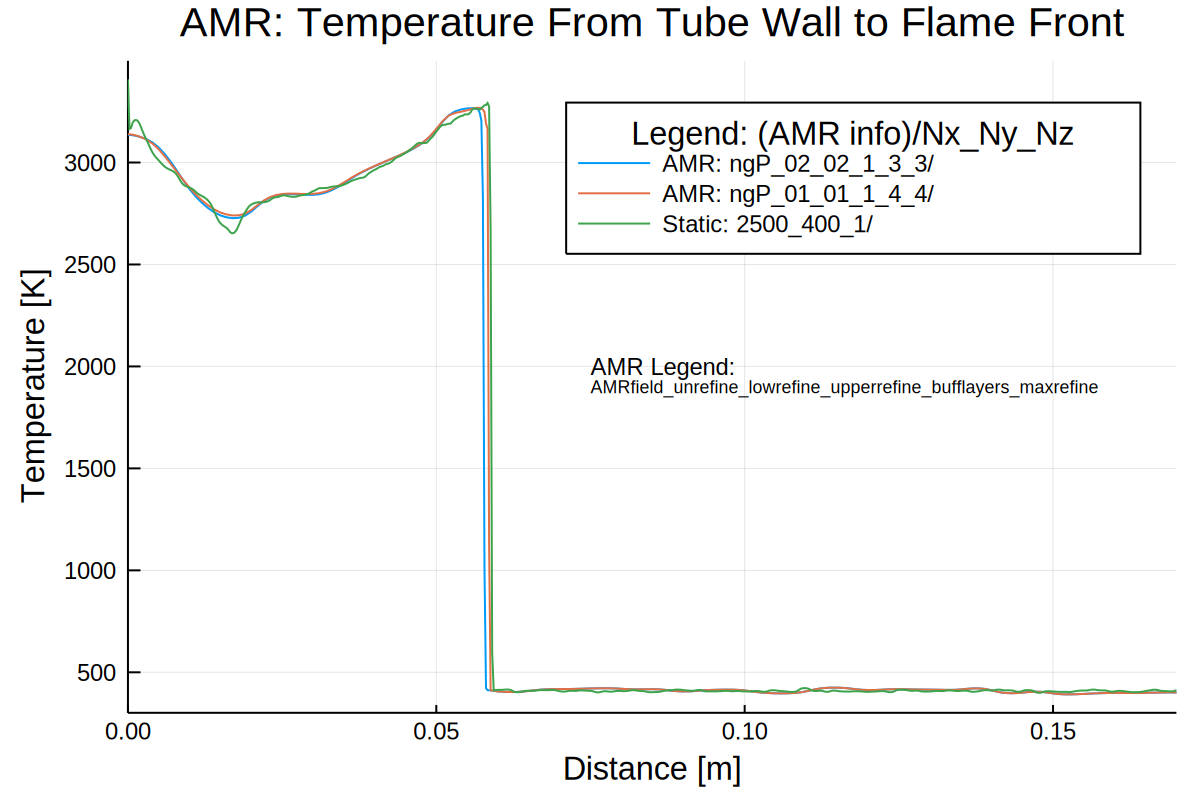

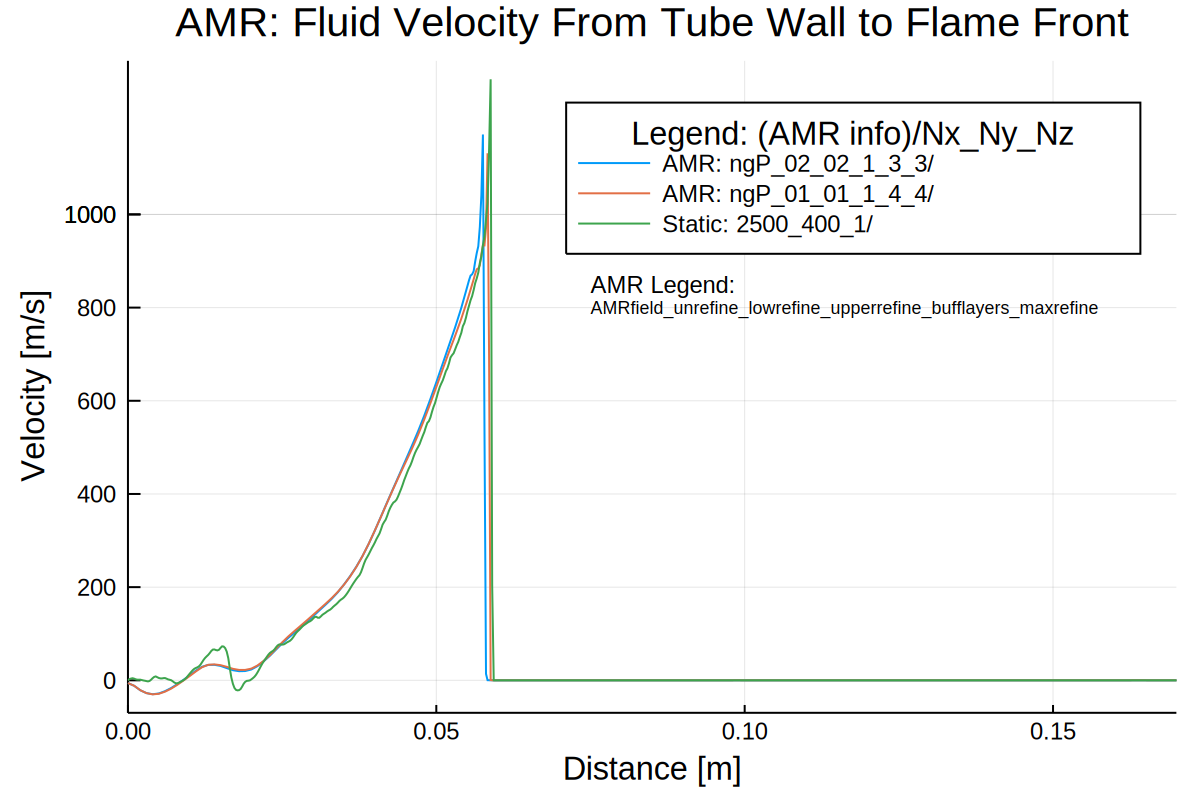

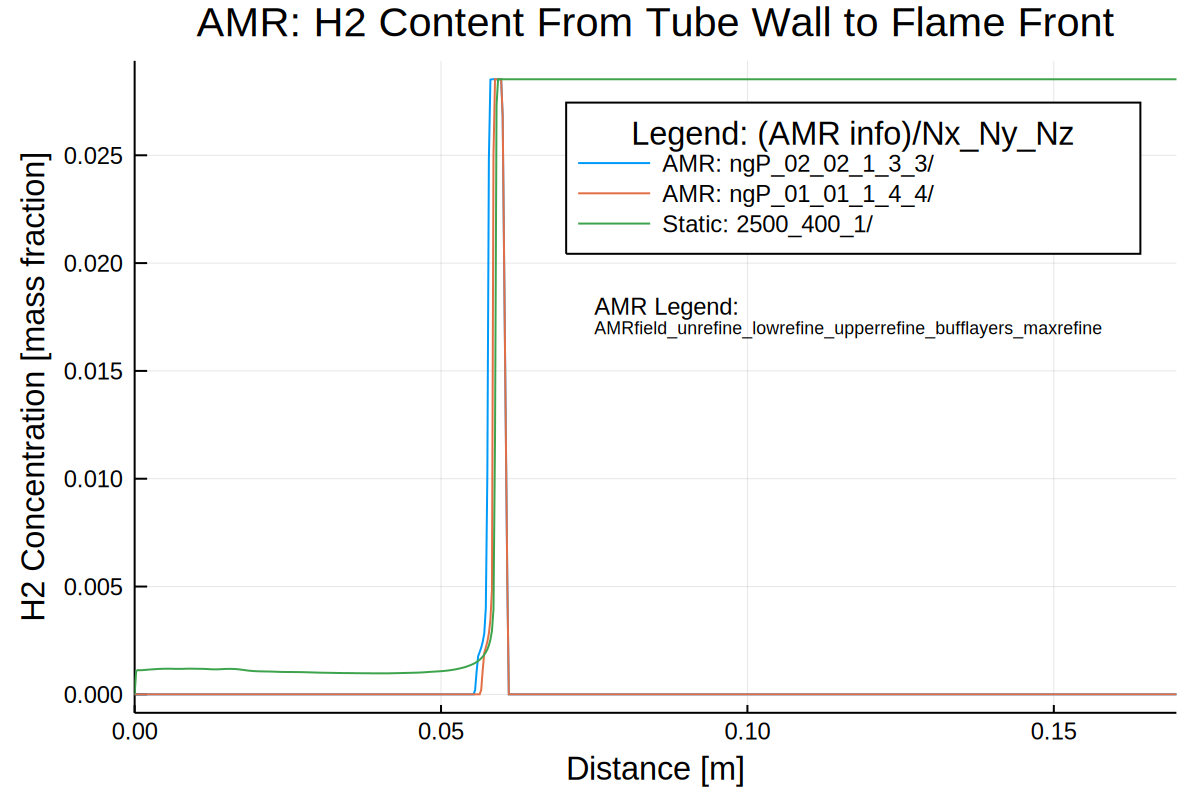

In [236]:
static_compare = 3 # which static mesh to compare to 

p_plot = plot() # initialize plot
for i=1:amr_nsims # sweep through simulations
    for j=1:amr_ntests # sweep through generic cases 
        #plot!(amr_x[:,i,j],amr_p[:,i,j]*0.000009869233,xlims=(0,0.17),label="AMR: "*amr_sim[j]*amr_names[i])
        plot!(amr_x[:,i,j],amr_p[:,i,j]*0.000009869233,xlims=(0,0.17),label="AMR: "*amr_sim[j])
    end
end
plot!(static_x[:,static_compare],static_p[:,static_compare]*0.000009869233,xlims=(0,0.17),label="Static: "*static_names[static_compare])
title!("AMR: Pressure From Tube Wall to Flame Front")
xlabel!("Distance [m]")
ylabel!("Pressure [atm]")
plot!(legendtitle="Legend: (AMR info)/Nx_Ny_Nz",dpi=200)
annotate!([(0.075, 8.5, text("AMR Legend:", 8, :black, :left))])
annotate!([(0.075, 7.8, text("AMRfield_unrefine_lowrefine_upperrefine_bufflayers_maxrefine", 6, :black, :left))])
#plot!(LinRange(0,0.5,1000),ones(1000).*15.56,xlims=(0,0.17),label="Target",linestyle=:dash,c="black")
#savefig("./figs/p.png")
display(p_plot)

t_plot = plot() # initialize plot
for i=1:amr_nsims # sweep through simulations
    for j=1:amr_ntests # sweep through generic cases 
        #plot!(amr_x[:,i,j],amr_T[:,i,j],xlims=(0,0.17),label="AMR: "*amr_sim[j]*amr_names[i])
        plot!(amr_x[:,i,j],amr_T[:,i,j],xlims=(0,0.17),label="AMR: "*amr_sim[j])
    end
end
plot!(static_x[:,static_compare],static_T[:,static_compare],xlims=(0,0.17),label="Static: "*static_names[static_compare])
title!("AMR: Temperature From Tube Wall to Flame Front")
xlabel!("Distance [m]")
ylabel!("Temperature [K]")
plot!(legendtitle="Legend: (AMR info)/Nx_Ny_Nz",dpi=200)
annotate!([(0.075, 2000, text("AMR Legend:", 8, :black, :left))])
annotate!([(0.075, 1900, text("AMRfield_unrefine_lowrefine_upperrefine_bufflayers_maxrefine", 6, :black, :left))])
#plot!(LinRange(0,0.5,1000),ones(1000).*15.56,xlims=(0,0.17),label="Target",linestyle=:dash,c="black")
#savefig("./figs/p.png")
display(t_plot)

u_plot = plot() # initialize plot
for i=1:amr_nsims # sweep through simulations
    for j=1:amr_ntests # sweep through generic cases 
        #plot!(amr_x[:,i,j],amr_Ux[:,i,j],xlims=(0,0.17),label="AMR: "*amr_sim[j]*amr_names[i])
        plot!(amr_x[:,i,j],amr_Ux[:,i,j],xlims=(0,0.17),label="AMR: "*amr_sim[j])
    end
end
plot!(static_x[:,static_compare],static_Ux[:,static_compare],xlims=(0,0.17),label="Static: "*static_names[static_compare])
title!("AMR: Fluid Velocity From Tube Wall to Flame Front")
xlabel!("Distance [m]")
ylabel!("Velocity [m/s]")
plot!(legendtitle="Legend: (AMR info)/Nx_Ny_Nz",dpi=200)
annotate!([(0.075, 850, text("AMR Legend:", 8, :black, :left))])
annotate!([(0.075, 800, text("AMRfield_unrefine_lowrefine_upperrefine_bufflayers_maxrefine", 6, :black, :left))])
#plot!(LinRange(0,0.5,1000),ones(1000).*15.56,xlims=(0,0.17),label="Target",linestyle=:dash,c="black")
#savefig("./figs/p.png")
display(u_plot)

h_plot = plot() # initialize plot
for i=1:amr_nsims # sweep through simulations
    for j=1:amr_ntests # sweep through generic cases 
        #plot!(amr_x[:,i,j],amr_H2[:,i,j],xlims=(0,0.17),label="AMR: "*amr_sim[j]*amr_names[i])
        plot!(amr_x[:,i,j],amr_H2[:,i,j],xlims=(0,0.17),label="AMR: "*amr_sim[j])
    end
end
plot!(static_x[:,static_compare],static_H2[:,static_compare],xlims=(0,0.17),label="Static: "*static_names[static_compare])
title!("AMR: H2 Content From Tube Wall to Flame Front")
xlabel!("Distance [m]")
ylabel!("H2 Concentration [mass fraction]")
plot!(legendtitle="Legend: (AMR info)/Nx_Ny_Nz",dpi=200)
annotate!([(0.075, 0.018, text("AMR Legend:", 8, :black, :left))])
annotate!([(0.075, 0.017, text("AMRfield_unrefine_lowrefine_upperrefine_bufflayers_maxrefine", 6, :black, :left))])
#plot!(LinRange(0,0.5,1000),ones(1000).*15.56,xlims=(0,0.17),label="Target",linestyle=:dash,c="black")
#savefig("./figs/p.png")
display(h_plot)

# AMR Refine Level Comparisons

In [283]:
l_sample = 1000 # number of sample points
amr_path = "/home/duncan/github/thesis/sim/analysis/amr/1000000/" # path to static mesh simulations
amr_sim = ["ngP_02_02_1_3_4","ngP_02_02_1_3_3","ngP_02_02_1_3_2","ngP_02_02_1_3_1"] .* "/" # specific AMR run
plot_names = [amr_sim[k][end-1] for k in 1:length(amr_sim)] # grab labels for plotting
amr_names = ["250_40_1"] .* "/" # simulation directory names
amr_nsims = length(amr_names) # number of amr cases per directory
amr_ntests = length(amr_sim) # number of generic types of runs (i.e. directories)
pp_s = "postProcessing/sample/3e-05/" # path to line samples
Tp_s = "data_T_p_H2.xy" # T, p data file name
U_s = "data_U.xy" # U vector file name 

tmp = [] # initalize temp dataframe variable 
amr_x = zeros(l_sample,amr_nsims,amr_ntests) # initialize position
amr_p = zeros(l_sample,amr_nsims,amr_ntests) # initialize pressure
amr_T = zeros(l_sample,amr_nsims,amr_ntests) # initialize temperature
amr_Ux = zeros(l_sample,amr_nsims,amr_ntests) # initialize x velocity
amr_H2 = zeros(l_sample,amr_nsims,amr_ntests) # initialize x velocity

for i=1:amr_nsims # sweep through refinements
    for j=1:amr_ntests # sweep through generic cases
        tmp = CSV.read(amr_path*amr_sim[j]*amr_names[i]*pp_s*Tp_s,delim=' ',header=0) # import position, temp, pressure
        amr_x[:,i,j] = tmp[:,1] # store position
        amr_p[:,i,j] = tmp[:,3] # store pressure
        amr_T[:,i,j] = tmp[:,2] # store temperature
        amr_H2[:,i,j]= tmp[:,4] # store H2 specie
    
        tmp = CSV.read(amr_path*amr_sim[j]*amr_names[i]*pp_s*U_s,delim=' ',header=0) # import position, Ux, Uy, Uz
        amr_Ux[:,i,j] = tmp[:,2] # store Ux
    end
end

### Compare 

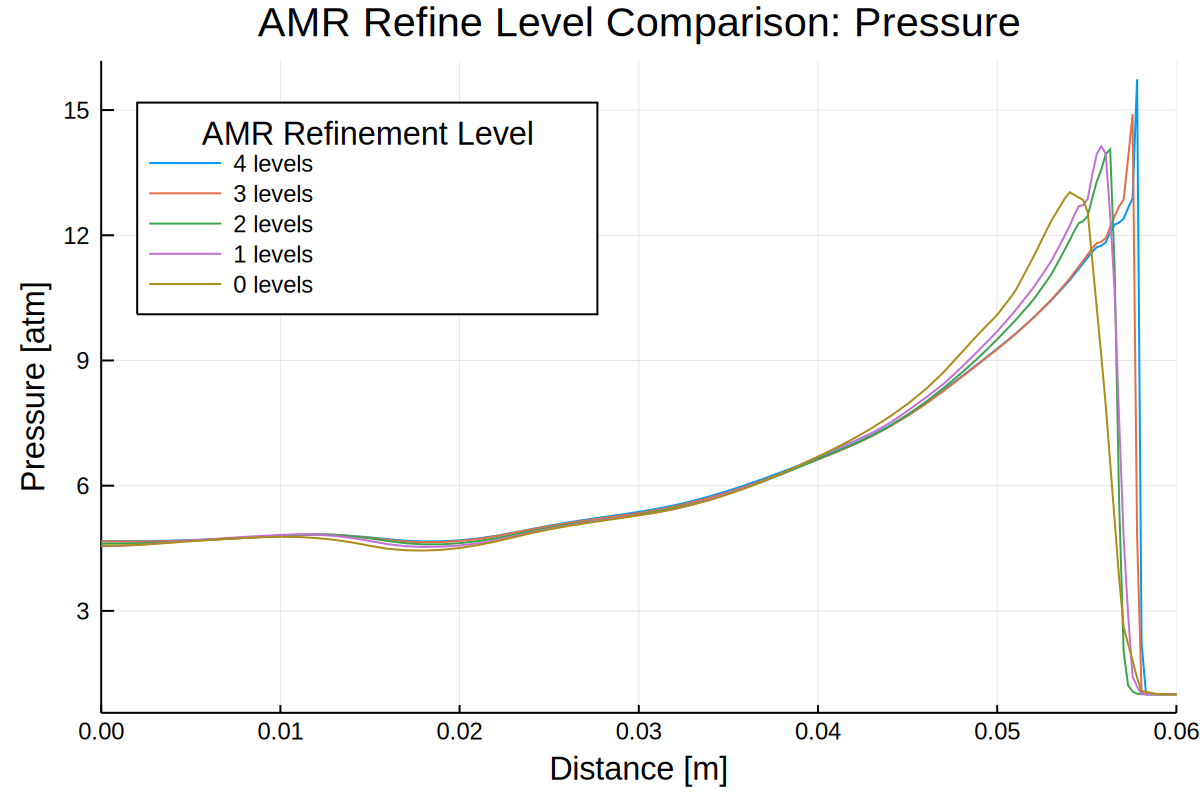

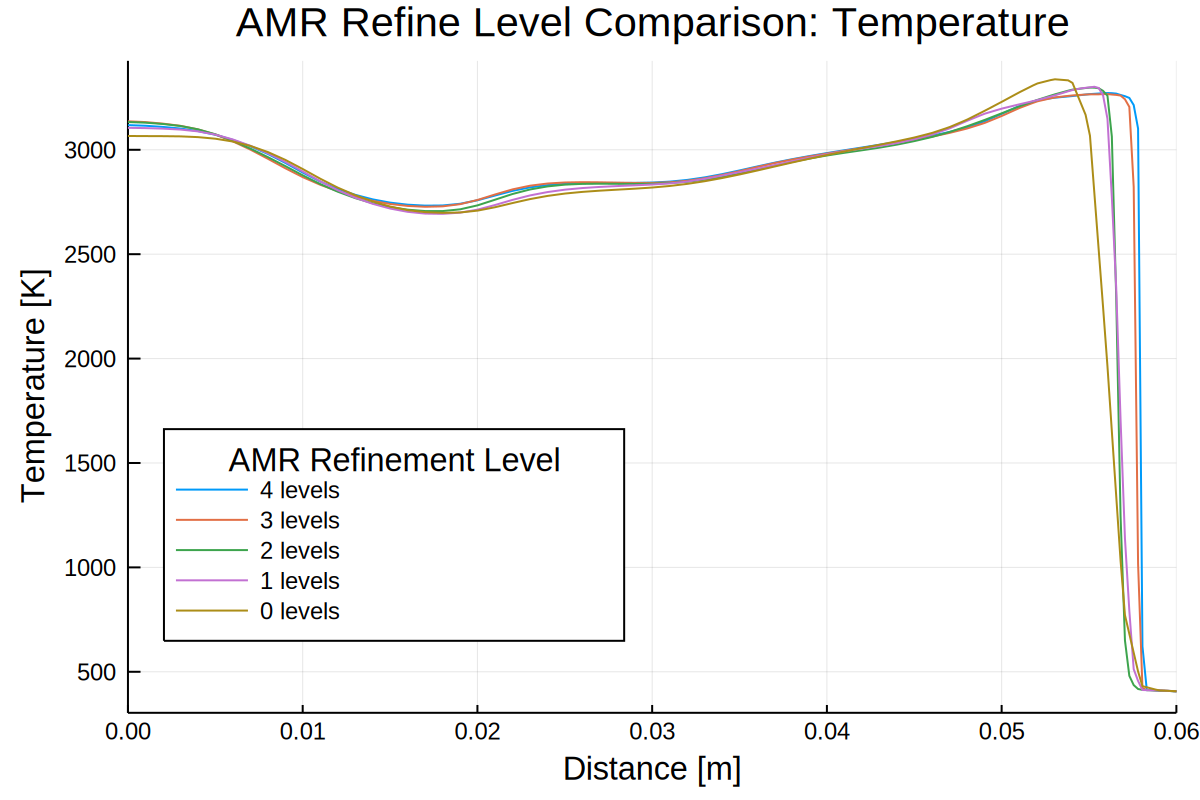

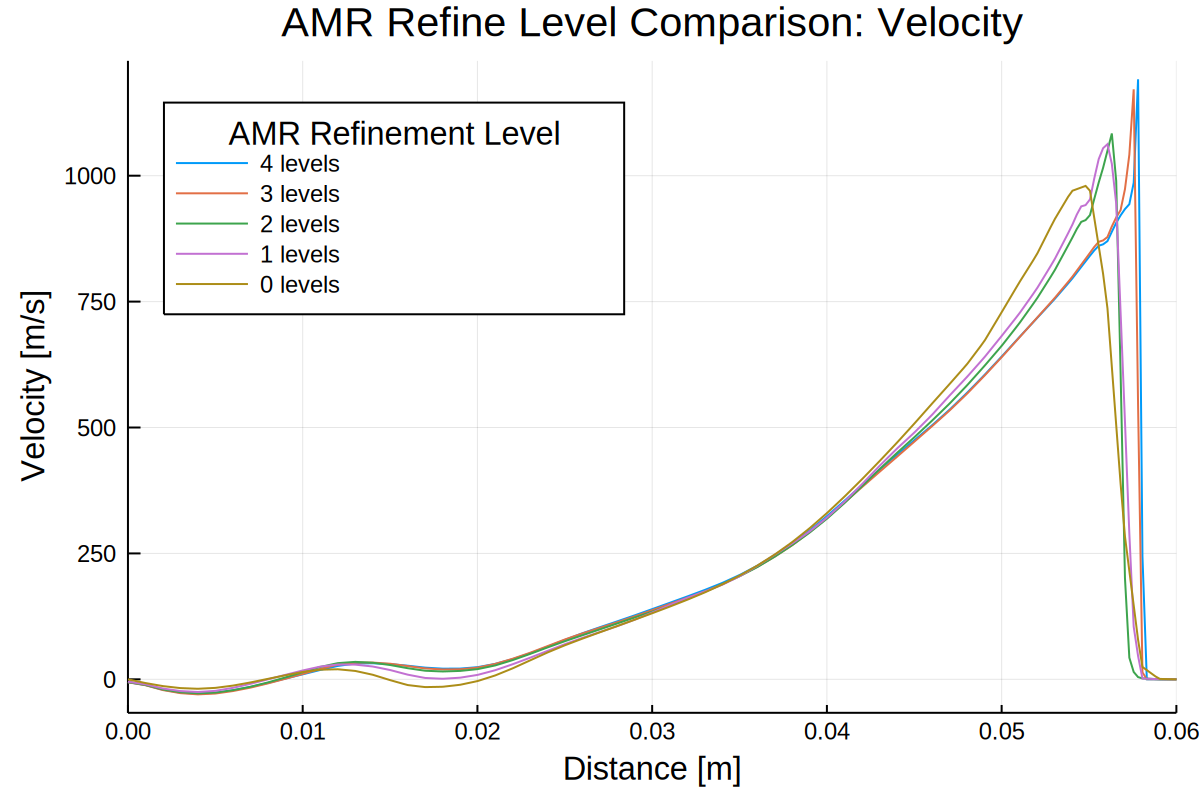

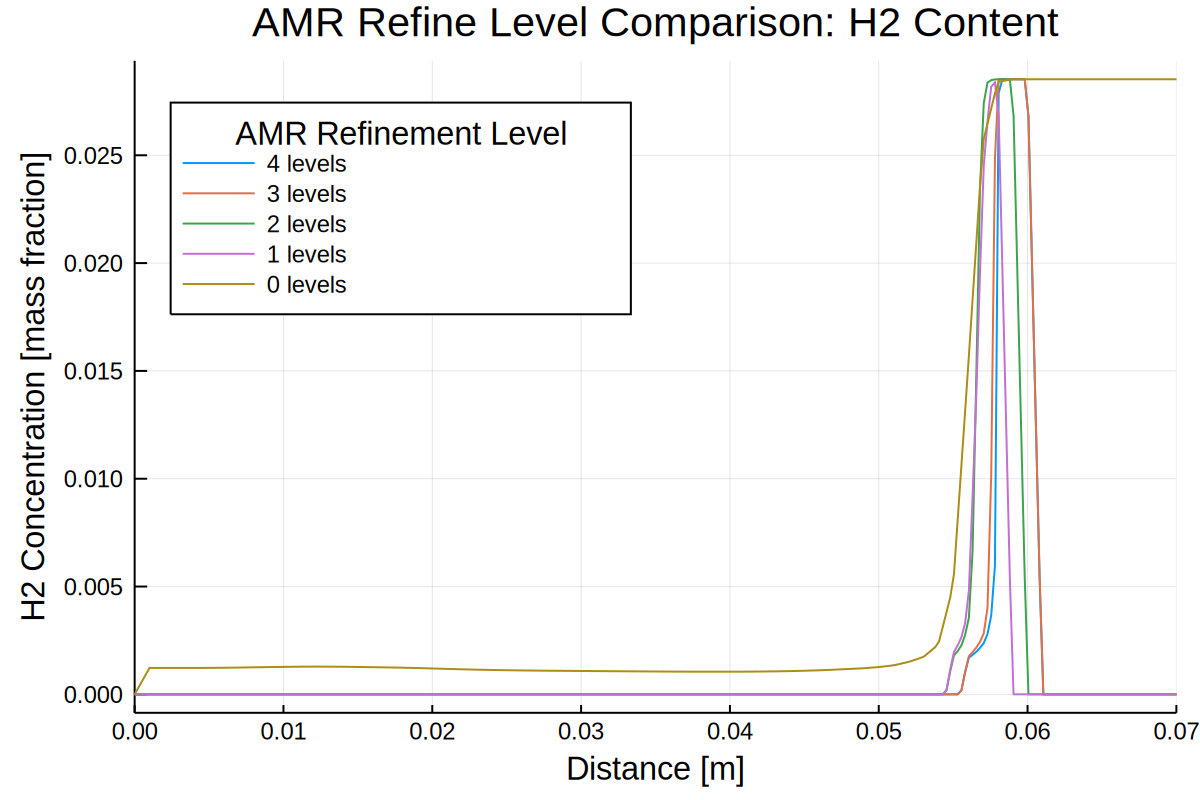

In [300]:
static_compare = 6 # which static mesh to compare to 

p_plot = plot() # initialize plot
for i=1:amr_nsims # sweep through simulations
    for j=1:amr_ntests # sweep through generic cases 
        #plot!(amr_x[:,i,j],amr_p[:,i,j]*0.000009869233,xlims=(0,0.17),label="AMR: "*amr_sim[j]*amr_names[i])
        plot!(amr_x[:,i,j],amr_p[:,i,j]*0.000009869233,xlims=(0,0.06),label=plot_names[j]*" levels")
    end
end
plot!(static_x[:,static_compare],static_p[:,static_compare]*0.000009869233,label="0 levels")
#plot!(static_x[:,3],static_p[:,3]*0.000009869233,label="Static: "*static_names[3])
title!("AMR Refine Level Comparison: Pressure")
xlabel!("Distance [m]")
ylabel!("Pressure [atm]")
plot!(legendtitle="AMR Refinement Level",legend=:topleft,dpi=200)
#savefig("./figs/p.png")
display(p_plot)

t_plot = plot() # initialize plot
for i=1:amr_nsims # sweep through simulations
    for j=1:amr_ntests # sweep through generic cases 
        plot!(amr_x[:,i,j],amr_T[:,i,j],xlims=(0,0.06),label=plot_names[j]*" levels")
    end
end
plot!(static_x[:,static_compare],static_T[:,static_compare],label=label="0 levels")
title!("AMR Refine Level Comparison: Temperature")
xlabel!("Distance [m]")
ylabel!("Temperature [K]")
plot!(legendtitle="AMR Refinement Level",legend=:bottomleft,dpi=200)
#savefig("./figs/p.png")
display(t_plot)

u_plot = plot() # initialize plot
for i=1:amr_nsims # sweep through simulations
    for j=1:amr_ntests # sweep through generic cases 
        plot!(amr_x[:,i,j],amr_Ux[:,i,j],xlims=(0,0.06),label=plot_names[j]*" levels")
    end
end
plot!(static_x[:,static_compare],static_Ux[:,static_compare],label=label="0 levels")
title!("AMR Refine Level Comparison: Velocity")
xlabel!("Distance [m]")
ylabel!("Velocity [m/s]")
plot!(legendtitle="AMR Refinement Level",legend=:topleft,dpi=200)
#savefig("./figs/p.png")
display(u_plot)

h_plot = plot() # initialize plot
for i=1:amr_nsims # sweep through simulations
    for j=1:amr_ntests # sweep through generic cases 
        plot!(amr_x[:,i,j],amr_H2[:,i,j],xlims=(0,0.07),label=plot_names[j]*" levels")
    end
end
plot!(static_x[:,static_compare],static_H2[:,static_compare],label=label="0 levels")
title!("AMR Refine Level Comparison: H2 Content")
xlabel!("Distance [m]")
ylabel!("H2 Concentration [mass fraction]")
plot!(legendtitle="AMR Refinement Level",legend=:topleft,dpi=200)
#savefig("./figs/p.png")
display(h_plot)